In [9]:
import pandas as pd
data=pd.read_csv('youtube_data2.csv')

In [10]:
data['e_m_lower'], data['e_m_upper'] = data['e_m_earnings'].str.split('-', 1).str

In [11]:
data['e_y_lower'], data['e_y_upper'] = data['e_y_earnings'].str.split('-', 1).str

In [12]:
def formatter(df, colname, before, after):
    df[colname] = [x.replace(before,after) for x in df[colname]]
    

In [13]:
columns = ['date','date','date','date','date','e_m_lower','e_m_upper','e_y_lower','e_y_upper']
befores = [',','th','nd','rd','st','$','$','$','$']
afters = ['','','','','','','','','']

for col, bef, aft in zip(columns, befores, afters):
    formatter(data, col, bef, aft)

In [14]:
def get_num(num_str):
    if num_str.find("K") > -1:
        num_str = num_str.replace("K", "").strip()
        num = float(num_str)*1000
    elif num_str.find("M") > -1:
        num_str = num_str.replace("M", "").strip()
        num = float(num_str)*1000000
    else:
        num = float(num_str)
        
    return num

data["e_m_lower"]=data["e_m_lower"].apply(get_num)
data["e_m_upper"]=data['e_m_upper'].apply(get_num)
data["e_y_lower"]=data['e_y_lower'].apply(get_num)
data["e_y_upper"]=data['e_y_upper'].apply(get_num)

In [15]:
# data['e_m_lower'] = [float(x.replace('K',''))*1000 if x.strip()[-1]=='K' else float(x.replace('M',''))*1000000 if x.strip()[-1]=='M'else x for 
#                      x in data['e_m_lower']]






In [16]:
from datetime import datetime 
data=data[data["date"] != '--']

In [17]:
data['date']=data['date'].apply(lambda x:datetime.strptime(x, '%b %d %Y'))

In [18]:
from datetime import date

def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
data['age']=data['date'].apply(lambda x: calculate_age(x))

In [19]:
data['v_per_view']=data['video_view']/data['uploads']

In [20]:
data['age_cate']=data['age'].apply(lambda x: 0 if x<=3 else 1 if 4<=x<=8 else 2)

In [21]:
# data.to_csv('youtube_clean.csv')

In [22]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import numpy as np
import seaborn as sns

In [23]:
group=data.groupby('channel_type')

1. Subscriber distribution by channel_type


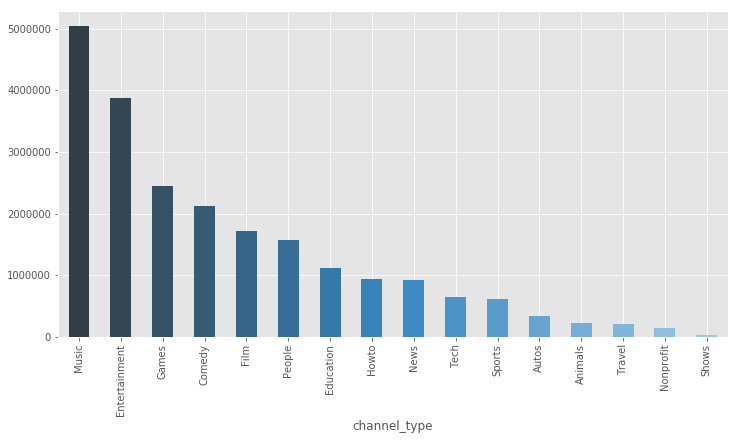

In [24]:
with sns.color_palette("Blues_d",16):
    plt.figure(figsize=(12,6))
    group['subs'].median().sort_values(ascending=False).plot.bar()

2. Video per view by subscribers

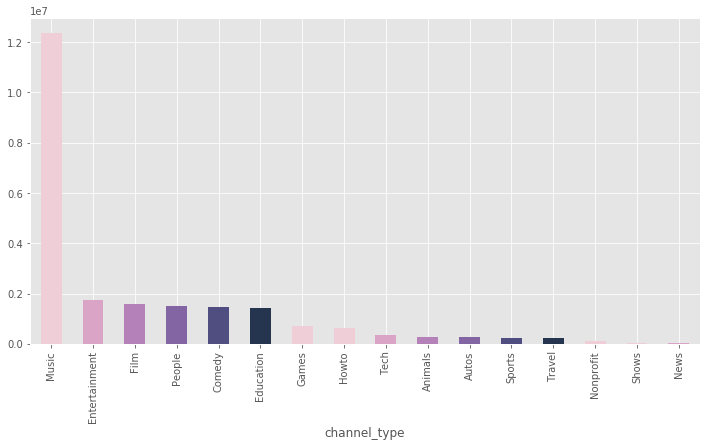

In [25]:
with sns.color_palette("ch:2.5,0.5,dark=.2"):
    plt.figure(figsize=(12,6))
    group['v_per_view'].median().sort_values(ascending=False).plot.bar()

3. zoom in to see the music subscribers distribution

0.21034647400400147


/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


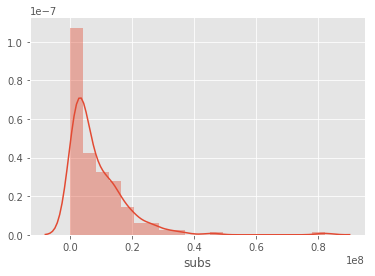

In [26]:
m_subs=data.loc[data['channel_type']=='Music'].sort_values('subs',ascending=False)
m_subs['subs'].mean()
m_subs['subs'].median()
t10=m_subs['subs'][:10].sum()
print(t10/m_subs['subs'].sum())

sns.distplot(m_subs['subs'],bins=20)


4. the amount of videos uploaded for different channel types

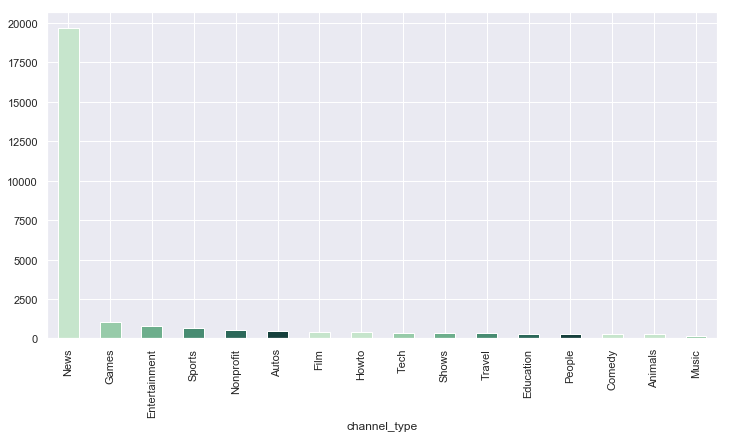

In [146]:
with sns.color_palette("ch:2.5,-.2,dark=.2"):
    plt.figure(figsize=(12,6))
    group['uploads'].median().sort_values(ascending=False).plot.bar()

5. estimated yearly earning by different channel types

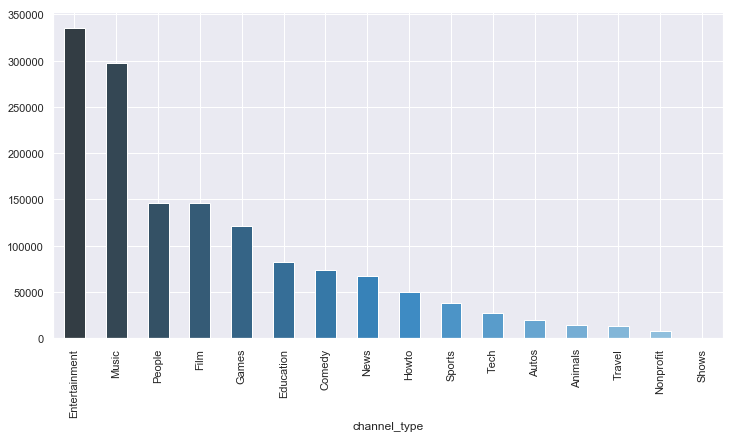

In [164]:
with sns.color_palette("Blues_d",16):
    plt.figure(figsize=(12,6))
    group['e_y_lower'].median().sort_values(ascending=False).plot.bar()

6. the median age for different channel types

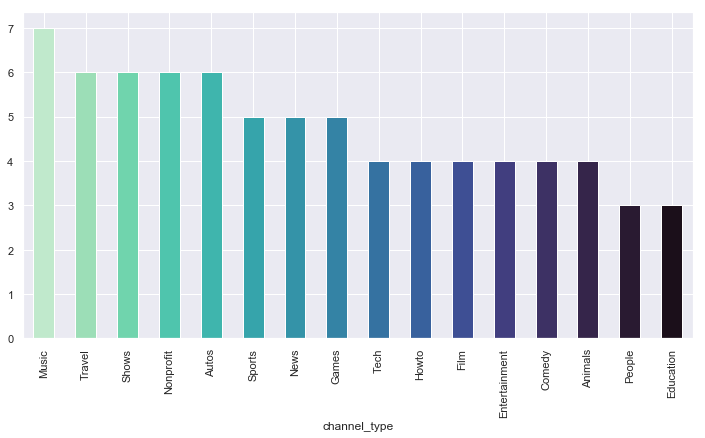

In [173]:
with sns.color_palette("mako_r",16):
    plt.figure(figsize=(12,6))
    group['age'].median().sort_values(ascending=False).plot.bar()

7. the correlation between numeric variables

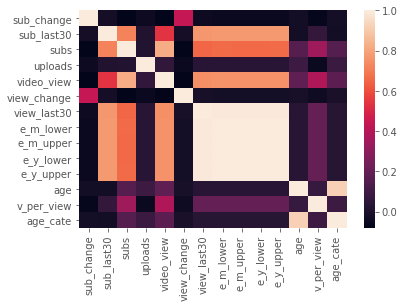

In [87]:
sns.heatmap(data.corr(),fmt=".2f")

8. scatterplot to see the relationship between amount of videos uploaded and subscribers

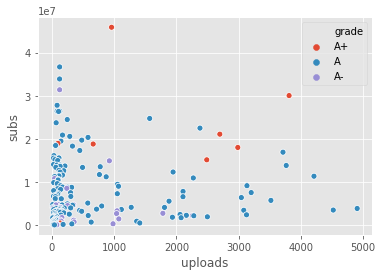

In [78]:
m_5000=m_subs.loc[m_subs.uploads<=5000]
sns.scatterplot(x=m_5000['uploads'],y=m_5000['subs'],hue = m_5000['grade'], data=data)

# no linear relationship between uploads and subs

9. scatterplot to see the relationship between subscribers and video views

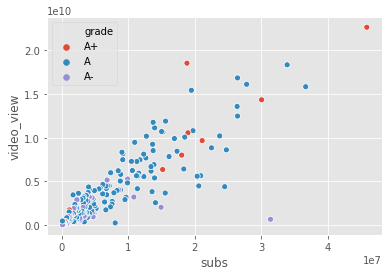

In [82]:
sns.scatterplot(x=m_5000['subs'],y=m_5000['video_view'],hue = m_5000['grade'], data=data)

10. scatterplot to show the relationship between subscribers and estimated yearly earnings

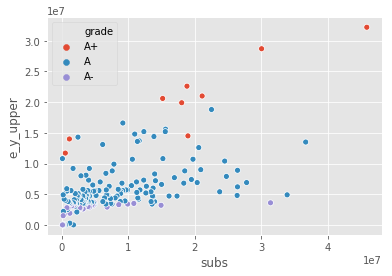

In [86]:
sns.scatterplot(x=m_5000['subs'],y=m_5000['e_y_upper'],hue = m_5000['grade'], data=data)

11. lineplot to see whether the age has influence on estimated yearly earnings for 7 channel types

In [103]:
data2=data.loc[data['channel_type'].isin(['Music','Entertainment','Comedy','Film','People','Games','News'])]


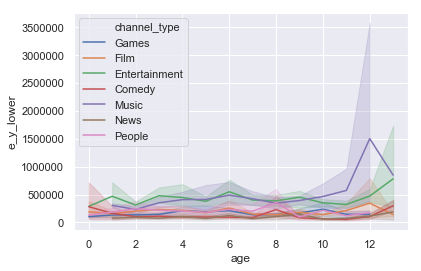

In [175]:

sns.lineplot(x=data2["age"], y=data2["e_y_lower"],
             hue=data2["channel_type"],
             data=data2)